# Vamos entender os Dados e o Problema de Negócio (Churn)

## 1. Qualidade dos Dados
- Há **valores ausentes ou inconsistentes** ?  
- Existem **valores duplicados** de `customerID`?  
- Como estão representadas as categorias (ex.: `No internet service` deve ser tratado como categoria própria)?  
- Há **outliers** em `MonthlyCharges` ou `TotalCharges` que parecem erros de digitação ou ruído?  

---

## 2. Perfil Geral dos Clientes
- Qual a **distribuição de tenure** (meses de contrato)? Clientes recentes têm maior churn?  
- Qual a distribuição de **MonthlyCharges** e **TotalCharges**?  
- Como estão distribuídos os métodos de pagamento (`PaymentMethod`)?  
- Qual a proporção de **contratos** (mensal, 1 ano, 2 anos)?  

---

## 3. Churn Global
- Qual a **taxa de churn total** (%)?  
- Como o churn varia entre **gêneros** (`gender`)?  
- Existe diferença significativa no churn de clientes **idosos** (`SeniorCitizen`)?  
- Clientes com **dependentes ou parceiro** têm churn menor?  

---

## 4. Impacto dos Serviços
- Clientes com **Fiber optic** têm maior churn que DSL?  
- Serviços adicionais (`OnlineSecurity`, `TechSupport`, `StreamingTV`, etc.) reduzem ou aumentam o churn?  
- Clientes com **múltiplos serviços** (ex.: internet + TV + telefone) são mais fiéis?  

---

## 5. Faturamento e Receita
- Qual a relação entre **valor mensal pago** (`MonthlyCharges`) e churn?  
- Clientes que pagam mais (alto ARPU) têm maior ou menor churn?  
- Como o **TotalCharges acumulado** se relaciona com churn (ex.: clientes antigos já pagaram bastante e tendem a sair menos)?  

---

## 6. Comportamento por Contrato e Pagamento
- Churn é maior em clientes com **contratos mensais** vs. anuais/bianuais?  
- O churn varia por **método de pagamento** (ex.: maior em `Electronic check`)?  
- **PaperlessBilling** (conta digital) influencia churn?  

---

## 7. Interações Entre Variáveis
- Existe combinação de fatores que amplifica churn?  
  - Ex.: `Contrato = mensal` + `PaymentMethod = Electronic check`.  
- Serviços digitais (ex.: `OnlineBackup`, `StreamingMovies`) aumentam retenção em determinados grupos?  

---

## 8. Perspectiva Financeira
- Qual o **ARPU médio** dos clientes que dão churn vs. os que ficam?  
- Qual a **receita perdida** por churn (estimada como ARPU × número de clientes perdidos)?  
- Segmentando por `tenure`, qual o **valor de vida perdido (LTV perdido)** com churn precoce?  

---

## 9. Questões para Segmentação Avançada
- Quais segmentos de clientes apresentam **alta taxa de churn** mas **alto ARPU** (alto impacto financeiro)?  
- Existem perfis com **baixo churn natural** que podem ser explorados para *cross-sell* ou *upsell*?  
- O churn se concentra em algum perfil “óbvio” que pode ser tratado com regras de negócio simples antes do modelo?  

---

## 10. Para Preparação do Modelo
- Quais variáveis têm maior **correlação com churn**?  
- Quais categorias precisam de **agrupamento** (ex.: serviços redundantes)?  
- Quais variáveis podem ser transformadas em **features derivadas** (ex.: `avg_charge_per_month = TotalCharges / tenure`)?  


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [1]:
import pandas as pd

abt00 = pd.read_csv('/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/WA_Fn-UseC_-Telco-Customer-Churn.csv')
abt00.shape

(7043, 21)

In [10]:
abt00.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
abt00.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Vamos verificar os dados faltantes (nulos ou missings)

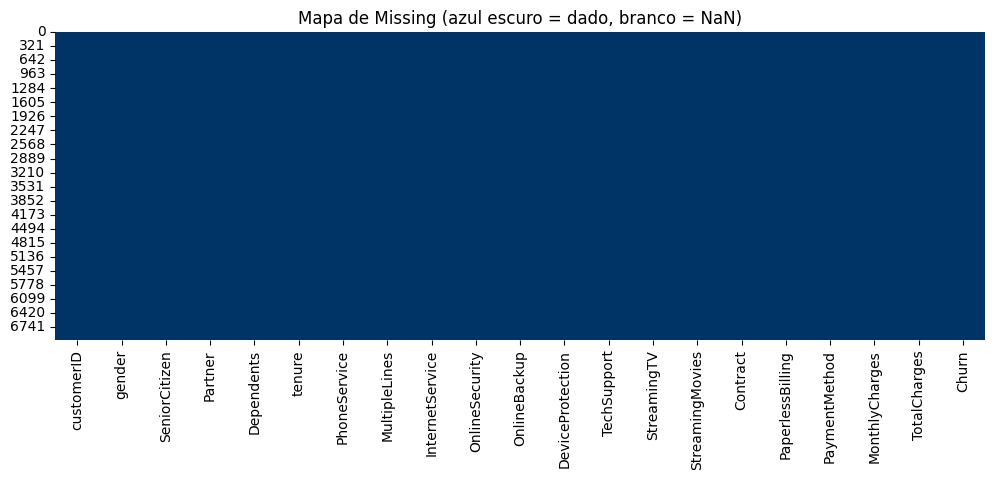

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.heatmap(
    abt00.isna(),
    cbar=False,
    cmap=["#003366", "white"]  # azul escuro = dados, branco = missing
)
plt.title("Mapa de Missing (azul escuro = dado, branco = NaN)", fontsize=12)
plt.show()

In [4]:
import pandas as pd

def tabela_metadados(df):
    tabela = pd.DataFrame({
        "variavel": df.columns,
        "tipo": df.dtypes.astype(str),
        "n_nulos": df.isna().sum().values,
        "pct_nulos": (df.isna().mean().values * 100).round(2)
    })

    # ajustar tipo mais legível
    tabela["tipo"] = tabela["tipo"].replace({
        "object": "categorica",
        "category": "categorica",
        "int64": "numerica",
        "float64": "numerica",
        "datetime64[ns]": "data"
    })

    # adicionar cardinalidade (somente para categóricas)
    tabela["cardinalidade"] = [
        df[col].nunique() if tipo == "categorica" else None
        for col, tipo in zip(tabela["variavel"], tabela["tipo"])
    ]

    return tabela

metadados = tabela_metadados(abt00)
metadados

,variavel,tipo,n_nulos,pct_nulos,cardinalidade
customerID,customerID,categorica,0,0.0,7043.0
gender,gender,categorica,0,0.0,2.0
SeniorCitizen,SeniorCitizen,numerica,0,0.0,NaN
Partner,Partner,categorica,0,0.0,2.0
Dependents,Dependents,categorica,0,0.0,2.0
tenure,tenure,numerica,0,0.0,NaN
PhoneService,PhoneService,categorica,0,0.0,2.0
MultipleLines,MultipleLines,categorica,0,0.0,3.0
InternetService,InternetService,categorica,0,0.0,3.0
OnlineSecurity,OnlineSecurity,categorica,0,0.0,3.0


In [5]:
import numpy as np
# Ajustando domínios do target para serem numericos 1 e 0
abt00["Churn"] = abt00["Churn"].map({"Yes": 1, "No": 0}).astype(int)

abt00["TotalCharges"] = abt00["TotalCharges"].replace(" ", np.nan)
abt00["TotalCharges"] = abt00["TotalCharges"].astype(float)

In [6]:
abt00.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
metadados = tabela_metadados(abt00)
metadados

,variavel,tipo,n_nulos,pct_nulos,cardinalidade
customerID,customerID,categorica,0,0.00,7043.0
gender,gender,categorica,0,0.00,2.0
SeniorCitizen,SeniorCitizen,numerica,0,0.00,NaN
Partner,Partner,categorica,0,0.00,2.0
Dependents,Dependents,categorica,0,0.00,2.0
tenure,tenure,numerica,0,0.00,NaN
PhoneService,PhoneService,categorica,0,0.00,2.0
MultipleLines,MultipleLines,categorica,0,0.00,3.0
InternetService,InternetService,categorica,0,0.00,3.0
OnlineSecurity,OnlineSecurity,categorica,0,0.00,3.0


In [ ]:
metadados.to_csv('/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/metadados_telcos.csv', index=False)

In [ ]:
abt00.to_csv('/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/abt_00_telcos.csv', index=False)

## Vamos analisar os dados

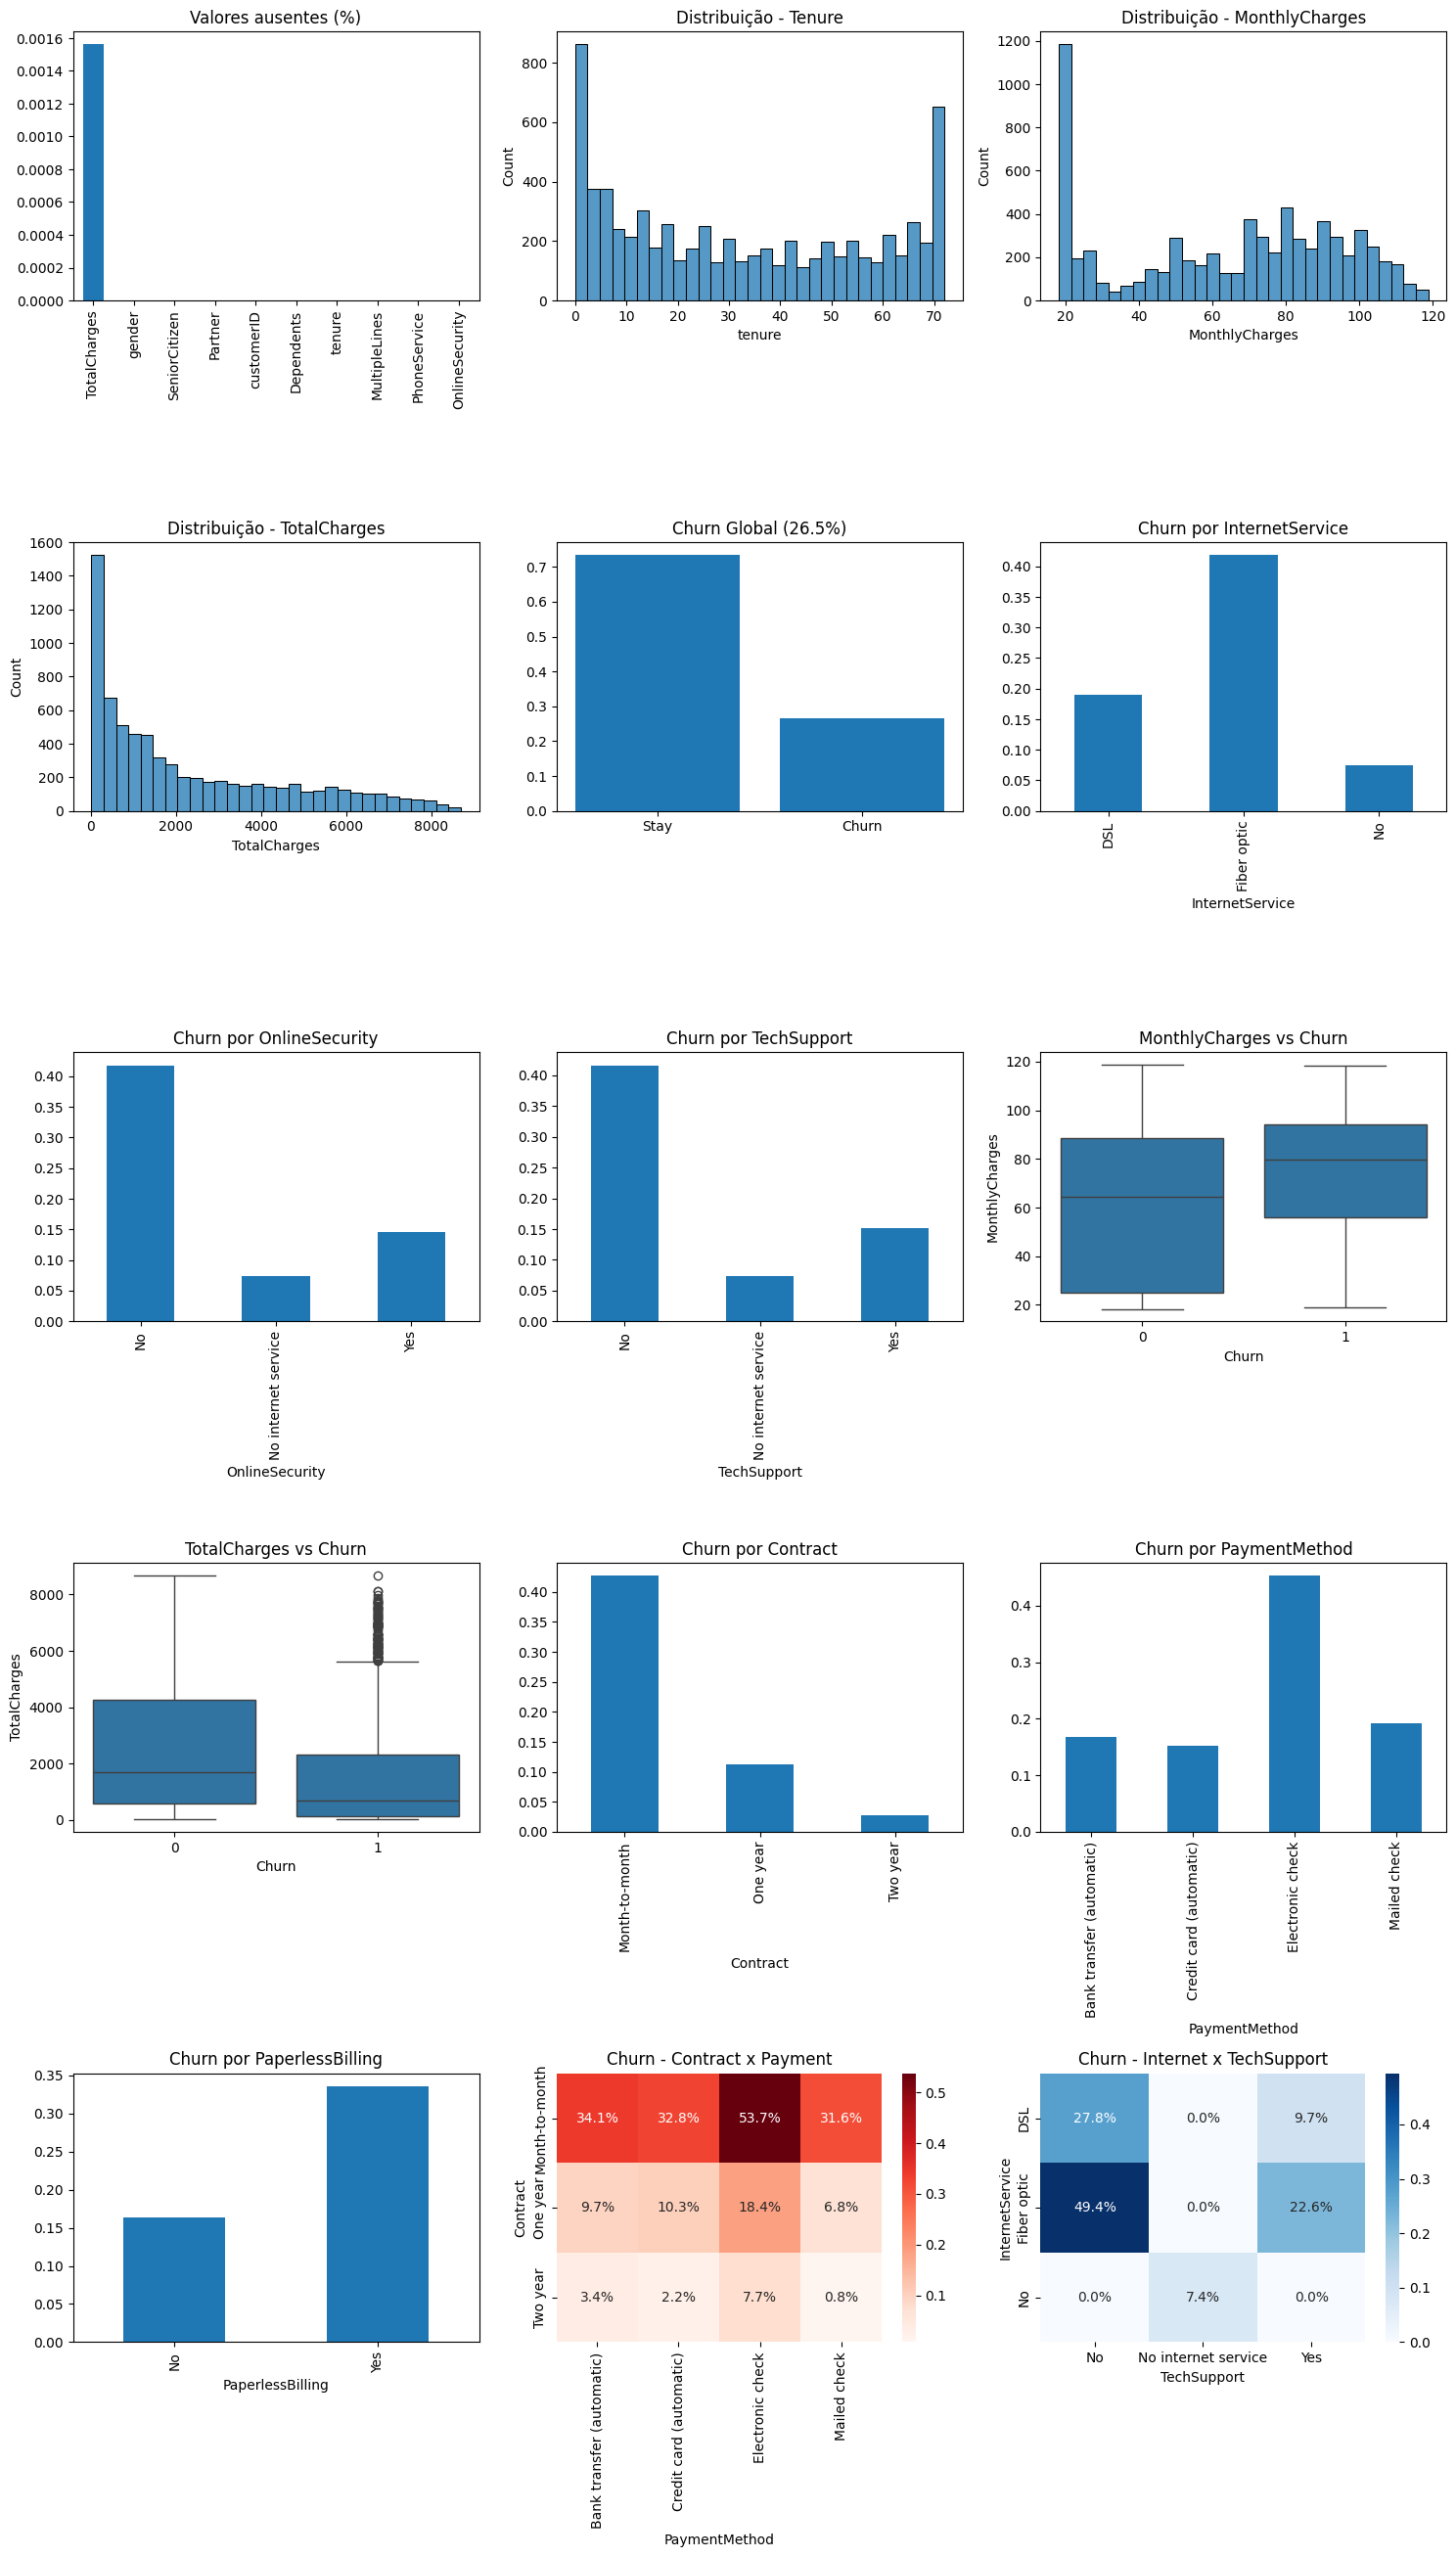

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



def eda_grid(df, n_cols=4):
    fig, axes = plt.subplots(9, n_cols, figsize=(n_cols*5, 9*5))
    axes = axes.flatten()
    idx = 0

    # ====== 1) Qualidade dos dados (exemplo: missing values) ======
    na = df.isna().mean().sort_values(ascending=False).head(10)
    na.plot(kind="bar", ax=axes[idx], title="Valores ausentes (%)")
    idx += 1

    # ====== 2) Perfil Geral ======
    if "tenure" in df:
        sns.histplot(df["tenure"], bins=30, kde=False, ax=axes[idx])
        axes[idx].set_title("Distribuição - Tenure"); idx+=1
    if "MonthlyCharges" in df:
        sns.histplot(df["MonthlyCharges"], bins=30, kde=False, ax=axes[idx])
        axes[idx].set_title("Distribuição - MonthlyCharges"); idx+=1
    if "TotalCharges" in df:
        sns.histplot(df["TotalCharges"], bins=30, kde=False, ax=axes[idx])
        axes[idx].set_title("Distribuição - TotalCharges"); idx+=1

    # ====== 3) Churn Global ======
    churn_rate = df["Churn"].mean()
    axes[idx].bar(["Stay","Churn"], [1-churn_rate, churn_rate])
    axes[idx].set_title(f"Churn Global ({churn_rate:.1%})"); idx+=1

    # ====== 4) Impacto dos Serviços ======
    for col in ["InternetService","OnlineSecurity","TechSupport"]:
        if col in df:
            tmp = df.groupby(col)["Churn"].mean()
            tmp.plot(kind="bar", ax=axes[idx], title=f"Churn por {col}")
            idx+=1

    # ====== 5) Faturamento ======
    if "MonthlyCharges" in df:
        sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=axes[idx])
        axes[idx].set_title("MonthlyCharges vs Churn"); idx+=1
    if "TotalCharges" in df:
        sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=axes[idx])
        axes[idx].set_title("TotalCharges vs Churn"); idx+=1

    # ====== 6) Contratos e Pagamento ======
    for col in ["Contract","PaymentMethod","PaperlessBilling"]:
        if col in df:
            tmp = df.groupby(col)["Churn"].mean()
            tmp.plot(kind="bar", ax=axes[idx], title=f"Churn por {col}")
            idx+=1

    # ====== 7) Interações ======
    if {"Contract","PaymentMethod"} <= set(df.columns):
        tab = pd.crosstab(df["Contract"], df["PaymentMethod"], values=df["Churn"], aggfunc="mean").fillna(0)
        sns.heatmap(tab, annot=True, fmt=".1%", cmap="Reds", ax=axes[idx])
        axes[idx].set_title("Churn - Contract x Payment"); idx+=1
    if {"InternetService","TechSupport"} <= set(df.columns):
        tab = pd.crosstab(df["InternetService"], df["TechSupport"], values=df["Churn"], aggfunc="mean").fillna(0)
        sns.heatmap(tab, annot=True, fmt=".1%", cmap="Blues", ax=axes[idx])
        axes[idx].set_title("Churn - Internet x TechSupport"); idx+=1

    # ====== 8) Perspectiva Financeira ======
    # if "MonthlyCharges" in df:
    #     lost = df.loc[df["Churn"]==1,"MonthlyCharges"].sum()
    #     axes[idx].bar(["Receita perdida"], [lost])
    #     axes[idx].set_title(f"Receita Mensal Perdida ~ R${lost:,.0f}"); idx+=1

    # # ====== 9) Segmentos avançados ======
    # if {"Contract","PaymentMethod"} <= set(df.columns):
    #     seg = df.groupby("Contract").agg(churn=("Churn","mean"), arpu=("MonthlyCharges","mean"))
    #     seg.plot(kind="bar", ax=axes[idx], title="Segmentos - Contrato"); idx+=1

    # apagar subplots vazios
    for j in range(idx, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# rodar a função
eda_grid(abt00, n_cols=3)


### Insights de Negócio

# 📊 Insights de Negócio da Análise Exploratória (EDA)

Resumo dos principais insights obtidos em cada gráfico, conectando **padrões de dados** com **impacto no negócio**.

---

## Primeira grade de gráficos
1. **Valores ausentes (%)**  
   - Apenas `TotalCharges` possui valores nulos, e em quantidade mínima.  
   - **Insight**: a base é **confiável**, exigindo pouca imputação.

2. **Distribuição - Tenure**  
   - Muitos clientes cancelam logo no início (`tenure = 0`), mas os que permanecem tendem a ficar por muito tempo.  
   - **Insight**: churn **precoce** é o maior problema; clientes antigos são altamente fiéis.

3. **Distribuição - MonthlyCharges**  
   - Distribuição bimodal (baixo custo vs. alto custo).  
   - **Insight**: existem **dois perfis de clientes** distintos — planos básicos e planos premium.

4. **Distribuição - TotalCharges**  
   - A maioria dos clientes acumula baixo gasto (saíram cedo), poucos chegam a valores altos.  
   - **Insight**: **clientes antigos são os mais valiosos** para a receita recorrente.

5. **Churn Global (26.5%)**  
   - 1 a cada 4 clientes cancela.  
   - **Insight**: churn é um **problema crítico** que exige estratégias de retenção.

6. **Churn por InternetService**  
   - Clientes de fibra ótica têm churn bem mais alto (~42%).  
   - **Insight**: **fibra ótica está gerando insatisfação**, possivelmente por preço ou qualidade.

---

## Segunda grade de gráficos
7. **Churn por OnlineSecurity**  
   - Clientes sem segurança online têm churn >40%.  
   - **Insight**: oferecer **serviços adicionais de segurança** pode reduzir cancelamentos.

8. **Churn por TechSupport**  
   - Sem suporte técnico → churn alto. Com suporte → churn baixo.  
   - **Insight**: **suporte ativo** é fator de fidelização.

9. **MonthlyCharges vs. Churn**  
   - Clientes que cancelam pagam tarifas mais altas em média.  
   - **Insight**: **preço elevado é um driver de churn**.

10. **TotalCharges vs. Churn**  
   - Cancelamentos ocorrem cedo (baixo total acumulado), mas há exceções caras.  
   - **Insight**: perder **clientes de alto valor é um grande prejuízo**.

11. **Churn por Contract**  
   - Month-to-month → churn altíssimo (>40%).  
   - Contratos de 1 ou 2 anos → churn <10%.  
   - **Insight**: **contratos longos blindam contra churn**.

12. **Churn por PaymentMethod**  
   - Electronic check → churn alto (~45%).  
   - Pagamento automático → churn baixo (~15%).  
   - **Insight**: incentivar **pagamento automático aumenta retenção**.

---

## Terceira grade de gráficos
13. **Churn por PaperlessBilling**  
   - Clientes com faturamento digital têm churn maior (~34%).  
   - **Insight**: pode refletir **perfil mais jovem e volátil**, exigindo estratégias específicas.

14. **Churn - Contract x PaymentMethod**  
   - Pior cenário: **month-to-month + electronic check (~54% churn)**.  
   - Melhor cenário: **2 anos + pagamento automático (<3%)**.  
   - **Insight**: **campanhas de migração** para contratos longos e métodos automáticos são chave.

15. **Churn - Internet x TechSupport**  
   - Fibra ótica sem suporte → churn altíssimo (~49%).  
   - DSL + suporte → churn baixo (~10%).  
   - **Insight**: **problema concentrado nos clientes de fibra ótica sem suporte**.

---

## ✅ Resumo Executivo
- **Drivers de risco**: contratos curtos, electronic check, ausência de serviços adicionais, fibra ótica, clientes novos e com alto ticket mensal.  
- **Drivers de retenção**: contratos longos, pagamento automático, serviços adicionais, clientes de baixo ticket.  
- **Ações recomendadas**:  
  - Incentivar **contratos longos**.  
  - Migrar clientes de **electronic check para métodos automáticos**.  
  - Oferecer **segurança online e suporte técnico como pacotes de fidelização**.  
  - Tratar **clientes de fibra ótica** como prioridade em retenção.  
